## Applying the PPS to the Titanic dataset
- This script shows you how to apply the PPS to the Titanic dataset
- If you want to execute the script yourself, you need to have valid installations of the packages ppscore, seaborn and pandas.

In [2]:
import pandas as pd
import seaborn as sns

import ppscore as pps

In [3]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [4]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

In [5]:
df = pd.read_csv("titanic.csv")

## Preparation of the Titanic dataset
- Selecting a subset of columns
- Changing some data types
- Renaming the column names to be more clear

In [6]:
df = df[["Survived", "Pclass", "Sex", "Age", "Ticket", "Fare", "Embarked"]]
df = df.rename(columns={"Pclass": "Class"})
df = df.rename(columns={"Ticket": "TicketID"})
df = df.rename(columns={"Fare": "TicketPrice"})
df = df.rename(columns={"Embarked": "Port"})

## Single Predictive Power Score
- Answering the question: how well can Sex predict the Survival probability?

In [7]:
pps.score(df, "Sex", "Survived")

{'x': 'Sex',
 'y': 'Survived',
 'ppscore': 0,
 'case': 'unknown_error',
 'is_valid_score': False,
 'metric': None,
 'baseline_score': 0,
 'model_score': 0,
 'model': None}

In [8]:
pps.predictors(df, "Survived", platform_type="tensorflow")

Use /tmp/tmpkhpiss_y as temporary training directory
Use /tmp/tmp63txzt6k as temporary training directory
Use /tmp/tmpl7qa0fx9 as temporary training directory
Use /tmp/tmp4ldu1f8c as temporary training directory
Use /tmp/tmpyg32qa8e as temporary training directory
Use /tmp/tmpge9a09yg as temporary training directory


2021-12-17 16:20:33.096096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 16:20:33.105541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 16:20:33.106032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 16:20:33.106919: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Class,Survived,0,unknown_error,False,None,0,0,None
1,Sex,Survived,0,unknown_error,False,None,0,0,None
2,Age,Survived,0,unknown_error,False,None,0,0,None
3,TicketID,Survived,0,unknown_error,False,None,0,0,None
4,TicketPrice,Survived,0,unknown_error,False,None,0,0,None
5,Port,Survived,0,unknown_error,False,None,0,0,None


## PPS matrix
- Answering the question: which predictive patterns exist between the columns?

In [9]:
matrix = pps.matrix(df, platform_type="tensorflow")

/home/vumna/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/home/vumna/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/home/vumna/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/home/vumna/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


Use /tmp/tmpl5z_tg75 as temporary training directory
Use /tmp/tmploemrt7f as temporary training directory
Use /tmp/tmp9t7abgzu as temporary training directory
Use /tmp/tmpttuta0g4 as temporary training directory
Use /tmp/tmp8zd70vmx as temporary training directory
Use /tmp/tmpwo15zht3 as temporary training directory
Use /tmp/tmpys6q5d39 as temporary training directory
Use /tmp/tmp_xbp5mvw as temporary training directory
Use /tmp/tmpsoxax0ok as temporary training directory
Use /tmp/tmp8g8xt9az as temporary training directory
Use /tmp/tmp_myt6yzx as temporary training directory
Use /tmp/tmpboc3z7c9 as temporary training directory
Use /tmp/tmpim11_evz as temporary training directory
Use /tmp/tmpig7id_5b as temporary training directory
Use /tmp/tmp9gjq6ji7 as temporary training directory
Use /tmp/tmpryty8dsg as temporary training directory
Use /tmp/tmp9qthld1d as temporary training directory
Use /tmp/tmp41g07wh0 as temporary training directory
Use /tmp/tmpxa4efw53 as temporary training dir

/home/vumna/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


Use /tmp/tmp_9zs1130 as temporary training directory
Use /tmp/tmp9g60bkuv as temporary training directory
Use /tmp/tmp6_edklsb as temporary training directory
Use /tmp/tmps924lg8y as temporary training directory
Use /tmp/tmp3hrj2emo as temporary training directory


/home/vumna/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


In [10]:
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Survived,Survived,1,predict_itself,True,None,0,1,None
1,Survived,Class,0,unknown_error,False,None,0,0,None
2,Survived,Sex,0,unknown_error,False,None,0,0,None
3,Survived,Age,0,unknown_error,False,None,0,0,None
4,Survived,TicketID,0,unknown_error,False,None,0,0,None
5,Survived,TicketPrice,0,unknown_error,False,None,0,0,None
6,Survived,Port,0,unknown_error,False,None,0,0,None
7,Class,Survived,0,unknown_error,False,None,0,0,None
8,Class,Class,1,predict_itself,True,None,0,1,None
9,Class,Sex,0,unknown_error,False,None,0,0,None


<AxesSubplot:title={'center':'PPS matrix'}, xlabel='feature', ylabel='target'>

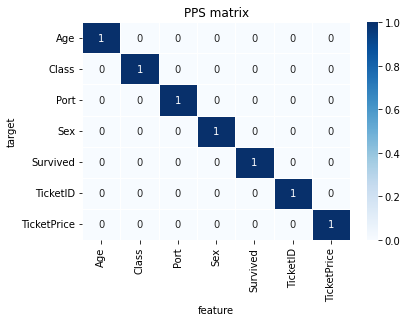

In [11]:
heatmap(matrix)

## Correlation matrix
- As a comparison to the PPS matrix

<AxesSubplot:title={'center':'Correlation matrix'}>

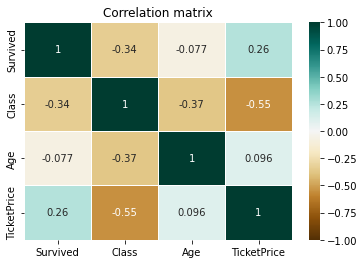

In [12]:
corr_heatmap(df.corr())